In [28]:
# Load the final processed dataset
import os
import pandas as pd
FIGURE_PATH = "../Figures/"

DATA_PATH = "../Dataset/neo_processed.csv"
df_processed = pd.read_csv(DATA_PATH)
print("Loaded shape:", df_processed.shape)
df_processed.head()

Loaded shape: (39709, 45)


,sats,H,diameter,albedo,rot_per,epoch,e,a,q,i,...,rms,diameter_estimated_flag,epoch_cal,class,hazardous_label,risk_score,perihelion_ratio,eccentric_energy,uncertainty_total,observation_span_years
0,0.0,10.39,16.840000,0.250,5.270,2461000.5,0.222836,1.458121,1.133199,10.828467,...,0.29796,0.0,2025-11-21.0000000,AMO,0,0.648766,0.777164,0.072404,1.179775e-06,127.621918
1,0.0,15.59,2.736306,0.137,5.801,2461000.5,0.546596,2.636590,1.195441,11.573111,...,0.40589,1.0,2025-11-21.0000000,AMO,0,0.318619,0.453404,0.787726,4.594650e-06,113.558904
2,0.0,13.81,4.200000,0.310,28.410,2461000.5,0.571170,2.473629,1.060766,9.400060,...,0.25971,0.0,2025-11-21.0000000,AMO,0,0.908811,0.428830,0.806985,1.123263e-06,107.619178
3,0.0,9.18,37.675000,0.238,10.297,2461000.5,0.533213,2.664969,1.243972,26.680736,...,0.31447,0.0,2025-11-21.0000000,AMO,0,0.317274,0.466787,0.757694,4.382260e-07,101.046575
4,0.0,17.37,1.000000,0.137,4.400,2461000.5,0.434632,1.919831,1.085411,11.868823,...,0.40562,0.0,2025-11-21.0000000,AMO,0,0.533213,0.565368,0.362666,7.272382e-06,93.005479


In [29]:
# Check target column exists and print alternatives if not
possible_targets = ['hazardous_label', 'hazardous', 'is_hazardous', 'pha']
for t in possible_targets:
    if t in df_processed.columns:
        print(f"Found candidate target column: {t}")

# Choose hazardous_label if present, otherwise pick the first candidate found
if 'hazardous_label' in df_processed.columns:
    target_col = 'hazardous_label'
else:
    found = [c for c in possible_targets if c in df_processed.columns]
    if found:
        target_col = found[0]
        print(f"Using alternative target column: {target_col}")
    else:
        print("Available columns:\n", df_processed.columns.tolist())
        raise SystemExit("No target column found. Please ensure the processed dataset contains the target column.")

print(f"Target column selected: {target_col}")

Found candidate target column: hazardous_label
Target column selected: hazardous_label


In [30]:
# Prepare features and target
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]

# Drop any original/duplicate label columns if present
for c in ['pha', 'hazardous', 'is_hazardous']:
    if c in X.columns:
        X = X.drop(columns=[c])

# Fill numeric NaNs with median (safety)
num_cols = X.select_dtypes(include=['number']).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

print("Feature matrix shape after preprocessing:", X.shape)
print("Sample columns:", X.columns[:20].tolist())

Feature matrix shape after preprocessing: (39709, 4169)
Sample columns: ['sats', 'H', 'diameter', 'albedo', 'rot_per', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'per', 'per_y', 'moid', 'moid_ld', 'moid_jup']


In [31]:
X.columns

Index(['sats', 'H', 'diameter', 'albedo', 'rot_per', 'epoch', 'e', 'a', 'q',
       'i',
       ...
       'epoch_cal_2025-10-16.0000000', 'epoch_cal_2025-10-17.0000000',
       'epoch_cal_2025-10-18.0000000', 'epoch_cal_2025-10-19.0000000',
       'epoch_cal_2025-10-20.0000000', 'epoch_cal_2025-10-21.0000000',
       'epoch_cal_2025-11-21.0000000', 'class_APO', 'class_ATE', 'class_IEO'],
      dtype='object', length=4169)

In [32]:
leaky = []
for col in X.columns:
    matches = (X[col] == y).sum()
    if matches > 0.5 * len(X):   # column matches target more than half the dataset
        leaky.append(col)

print("Leaky columns:", leaky)


Leaky columns: ['sats', 'epoch_cal_1990-10-27.0000000', 'epoch_cal_1991-01-18.0000000', 'epoch_cal_1991-05-12.0000000', 'epoch_cal_1991-10-07.0000000', 'epoch_cal_1991-10-08.0000000', 'epoch_cal_1991-11-05.0000000', 'epoch_cal_1991-12-07.0000000', 'epoch_cal_1992-02-28.0000000', 'epoch_cal_1992-12-27.0000000', 'epoch_cal_1993-01-29.0000000', 'epoch_cal_1993-03-30.0000000', 'epoch_cal_1993-04-27.0000000', 'epoch_cal_1993-05-22.0000000', 'epoch_cal_1994-03-12.0000000', 'epoch_cal_1994-03-15.0000000', 'epoch_cal_1994-03-17.0000000', 'epoch_cal_1994-04-09.0000000', 'epoch_cal_1994-07-07.0000000', 'epoch_cal_1994-09-02.0000000', 'epoch_cal_1994-10-12.0000000', 'epoch_cal_1994-11-01.0000000', 'epoch_cal_1994-11-04.0000000', 'epoch_cal_1994-12-09.0000000', 'epoch_cal_1995-02-03.0000000', 'epoch_cal_1995-02-06.0000000', 'epoch_cal_1995-02-28.0000000', 'epoch_cal_1995-03-30.0000000', 'epoch_cal_1995-07-06.0000000', 'epoch_cal_1996-01-17.0000000', 'epoch_cal_1996-01-23.0000000', 'epoch_cal_1996-

In [33]:
X_clean = X.drop(columns=leaky)
leaky = []
for col in X_clean.columns:
    matches = (X_clean[col] == y).sum()
    if matches > 0.5 * len(X_clean):   # column matches target more than half the dataset
        leaky.append(col)

print("Leaky columns:", leaky)


Leaky columns: []


In [35]:
X_sup =  X_clean.drop(columns=["epoch_cal_2025-11-21.0000000","class_APO","risk_score"])
print(X_sup.columns)

Index(['H', 'diameter', 'albedo', 'rot_per', 'epoch', 'e', 'a', 'q', 'i', 'om',
       'w', 'ma', 'ad', 'n', 'per', 'per_y', 'moid', 'moid_ld', 'moid_jup',
       't_jup', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om',
       'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per',
       'data_arc', 'n_obs_used', 'condition_code', 'rms',
       'diameter_estimated_flag', 'perihelion_ratio', 'eccentric_energy',
       'uncertainty_total', 'observation_span_years'],
      dtype='object')


In [8]:
remove_cols = [
    'hazardous', 'diameter', 'moid', 'moid_ld', 'moid_jup',
    'diameter_estimated_flag', 'condition_code',
    'epoch', 'epoch_cal', 'class'
]

df_unsup = X_sup.drop(columns=[c for c in remove_cols if c in X_sup.columns])
df_unsup = df_unsup.select_dtypes(include='number').dropna()
print(df_unsup.columns)

Index(['H', 'albedo', 'rot_per', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'per', 'per_y', 't_jup', 'sigma_e', 'sigma_a', 'sigma_q',
       'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n',
       'sigma_tp', 'sigma_per', 'data_arc', 'n_obs_used', 'rms',
       'perihelion_ratio', 'eccentric_energy', 'uncertainty_total',
       'observation_span_years'],
      dtype='object')


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sup)


In [55]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_gmm = df_processed.copy().reset_index(drop=True)
X_scaled = pd.DataFrame(X_scaled).reset_index(drop=True)

bic_scores = []
aic_scores = []
models = []

n_components_range = [1]  # extended for better search

for n_components in n_components_range:
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type='full',
        random_state=42
    )
    gmm.fit(X_scaled)
    bic = gmm.bic(X_scaled)
    aic = gmm.aic(X_scaled)

    bic_scores.append(bic)
    aic_scores.append(aic)
    models.append(gmm)

    print(f"{n_components} components → BIC={bic:.2f}, AIC={aic:.2f}")

# Pick best model by BIC
best_bic_index = np.argmin(bic_scores)
best_gmm = models[best_bic_index]
best_k = n_components_range[best_bic_index]

print(f"\n✔ Best model by BIC: {best_k} components\n")

# Predict cluster assignments + log-likelihood scores
clusters = best_gmm.predict(X_scaled)
log_likelihood = best_gmm.score_samples(X_scaled)

df_gmm["gmm_cluster"] = clusters
df_gmm["gmm_score"] = -log_likelihood     # higher score = more anomalous

# Anomalies = top 5% highest anomaly score
threshold = df_gmm["gmm_score"].quantile(0.95)
df_gmm["gmm_anomaly"] = (df_gmm["gmm_score"] >= threshold).astype(int)

print("\n--- Median values by anomaly group ---")
print(df_gmm.groupby("gmm_anomaly")["moid"].median())
print(df_gmm.groupby("gmm_anomaly")["diameter"].median())
print(df_gmm.groupby("gmm_anomaly")["H"].median())
print(df_gmm.groupby("gmm_anomaly")["eccentric_energy"].median())


1 components → BIC=-973214.40, AIC=-980601.23

✔ Best model by BIC: 1 components


--- Median values by anomaly group ---
gmm_anomaly
0    0.041981
1    0.088590
Name: moid, dtype: float64
gmm_anomaly
0    0.054096
1    0.516306
Name: diameter, dtype: float64
gmm_anomaly
0    24.11
1    19.43
Name: H, dtype: float64
gmm_anomaly
0    0.331550
1    0.522973
Name: eccentric_energy, dtype: float64


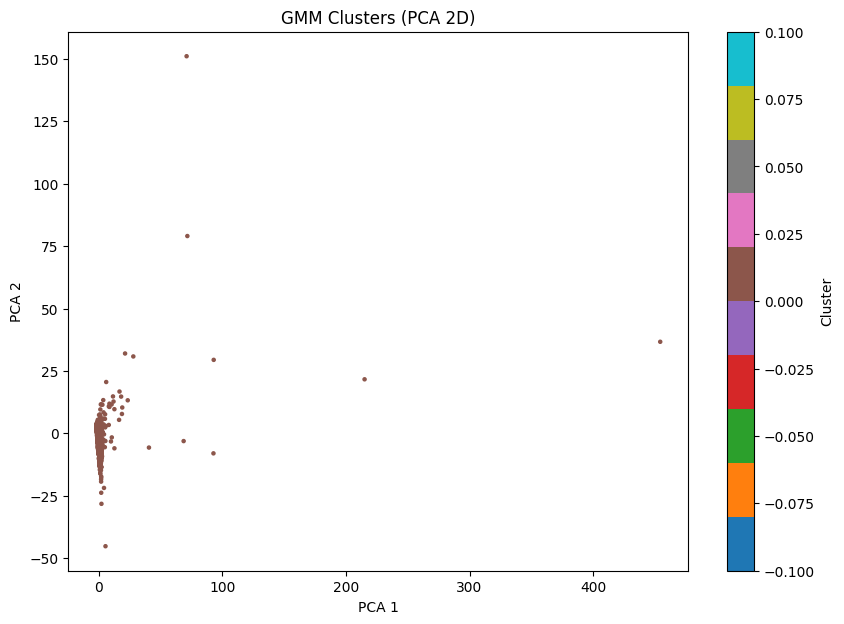

In [56]:
# === PCA visualization (2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_gmm["pca1"] = X_pca[:,0]
df_gmm["pca2"] = X_pca[:,1]

plt.figure(figsize=(10,7))
plt.scatter(df_gmm["pca1"], df_gmm["pca2"],
            c=df_gmm["gmm_cluster"], s=5, cmap="tab10")
plt.title("GMM Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


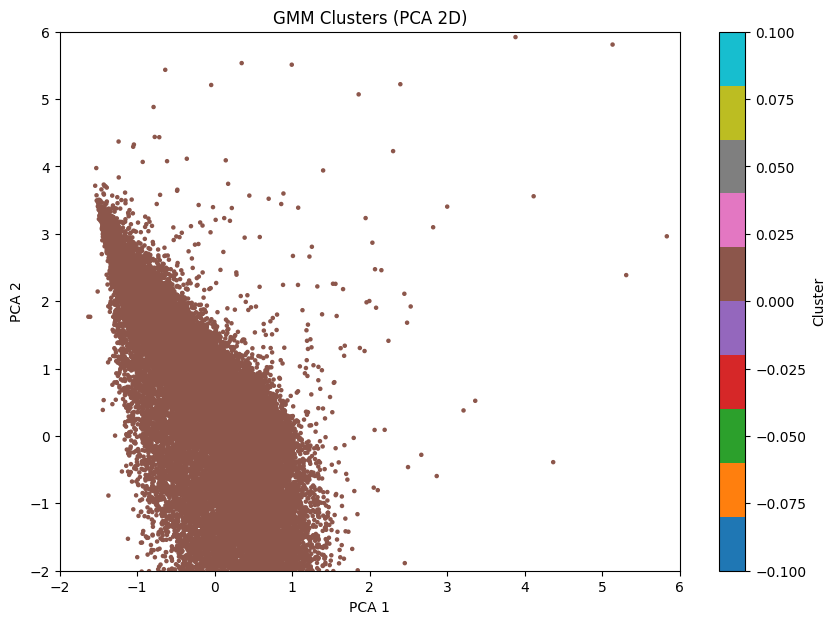

In [57]:
# === PCA visualization (2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_gmm["pca1"] = X_pca[:,0]
df_gmm["pca2"] = X_pca[:,1]

plt.figure(figsize=(10,7))
plt.scatter(df_gmm["pca1"], df_gmm["pca2"],
            c=df_gmm["gmm_cluster"], s=5, cmap="tab10")
plt.xlim(-2, 6)
plt.ylim(-2, 6)
plt.title("GMM Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


In [58]:
def nasa_pha(row):
    cond1 = row["moid"] < 0.05
    cond2 = (row["diameter"] > 0.14) or (row["H"] < 22)
    return int(cond1 and cond2)

df_gmm["nasa_pha"] = df_gmm.apply(nasa_pha, axis=1)

print("\n--- Anomaly vs NASA PHA correlation ---")
print(pd.crosstab(df_gmm["gmm_anomaly"], df_gmm["nasa_pha"]))

print("\n% of anomalies that are NASA-PHAs:")
print(df_gmm[df_gmm["gmm_anomaly"]==1]["nasa_pha"].mean())



--- Anomaly vs NASA PHA correlation ---
nasa_pha         0     1
gmm_anomaly             
0            35609  2114
1             1526   460

% of anomalies that are NASA-PHAs:
0.23162134944612287
